Comparative Model analysis on Attackson Autonomous Vehicles detection

XGBoost and Logistic Regression Model Performance: 99.20% @50Epochs

Training ensemble model...


c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:50:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Accuracy: 99.20%
              precision    recall  f1-score   support

           D       0.98      1.00      0.99       139
           F       0.98      1.00      0.99       110
           G       1.00      1.00      1.00       127
           R       1.00      0.96      0.98       119
           S       1.00      1.00      1.00       130

    accuracy                           0.99       625
   macro avg       0.99      0.99      0.99       625
weighted avg       0.99      0.99      0.99       625



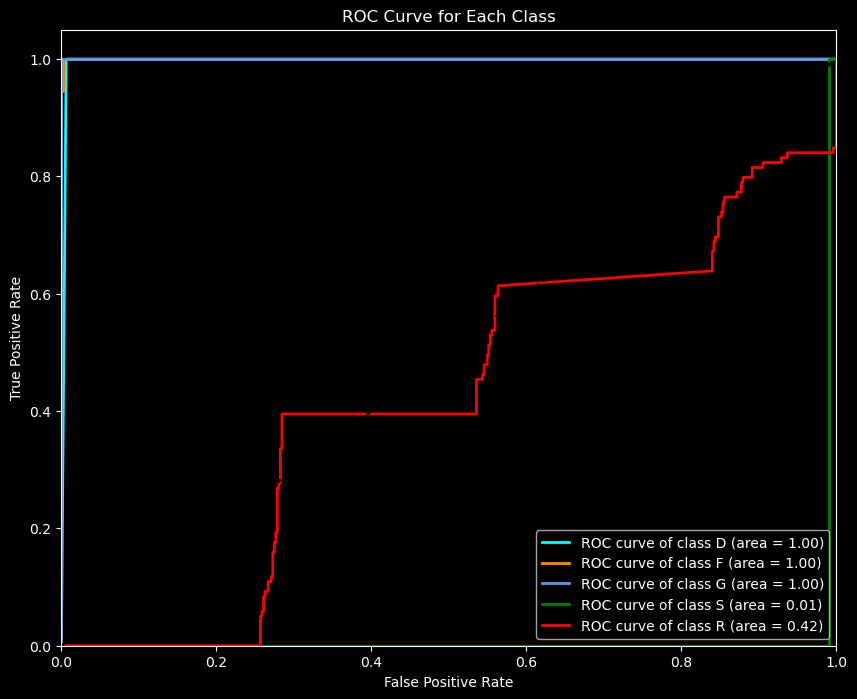

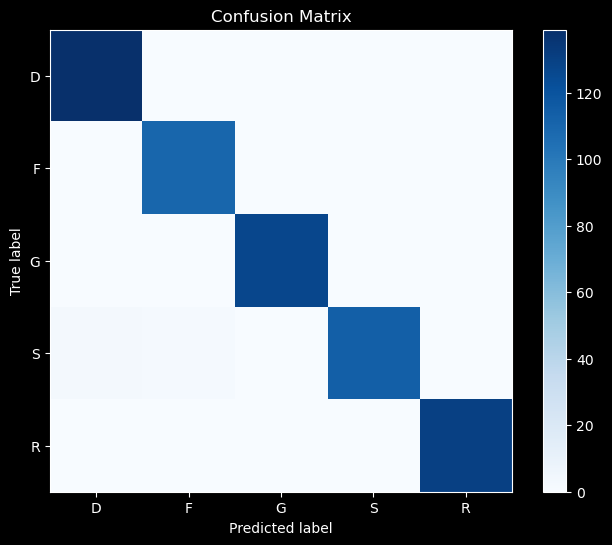

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import xgboost as xgb
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import VotingClassifier
import re

# Load the dataset
data = pd.read_csv('sampled_data.csv')

# Define cybersecurity threat keywords
#cyber_threat_keywords = ['D', 'F', 'G', 'S', 'R',]

# Preprocess the text column
def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)
    # Convert to lower case
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    return text

data['text'] = data['data']

# Define the cybersecurity threat keywords
cyber_threat_keywords = ['D', 'F', 'G', 'S', 'R']

# Function to flag the text data based on the presence of cybersecurity threat keywords
def flag_cyber_threat(flag):
    return flag if flag in cyber_threat_keywords else 'null'

# Apply the function to the 'flag' column and create a new 'label' column
data['label'] = data['flag'].apply(flag_cyber_threat)

# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text'])
y = data['label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the Logistic Regression model
log_reg = LogisticRegression()

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('lr', log_reg), ('xgb', xgb_model)], voting='soft')

# Train the ensemble model
print("Training ensemble model...")
ensemble_model.fit(X_train, y_train)

# Predict and evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Model Accuracy: {accuracy_ensemble * 100:.2f}%')
print(classification_report(y_test, y_pred_ensemble))


from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output labels for ROC curve plotting
y_test_binarized = label_binarize(y_test, classes=cyber_threat_keywords)
n_classes = y_test_binarized.shape[1]

# Predict probabilities
y_score = ensemble_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {cyber_threat_keywords[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

# Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(cyber_threat_keywords))
plt.xticks(tick_marks, cyber_threat_keywords)
plt.yticks(tick_marks, cyber_threat_keywords)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


LSTM Model Performance on the attack detection

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 229ms/step - accuracy: 0.2447 - loss: 1.5948 - val_accuracy: 0.8853 - val_loss: 1.2621
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.5851 - loss: 1.1055 - val_accuracy: 0.8613 - val_loss: 0.4751
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.7742 - loss: 0.6445 - val_accuracy: 0.9067 - val_loss: 0.3373
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.8323 - loss: 0.4799 - val_accuracy: 0.9040 - val_loss: 0.3057
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - accuracy: 0.8510 - loss: 0.4364 - val_accuracy: 0.9040 - val_loss: 0.2809
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.8773 - loss: 0.3823 - val_accuracy: 0.9147 - val_loss: 0.2669
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.8692 - loss: 0.3689 - val_accuracy: 0.8907 - val_loss: 0.2861
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.8922 - loss: 0.3380 - val_accuracy: 0

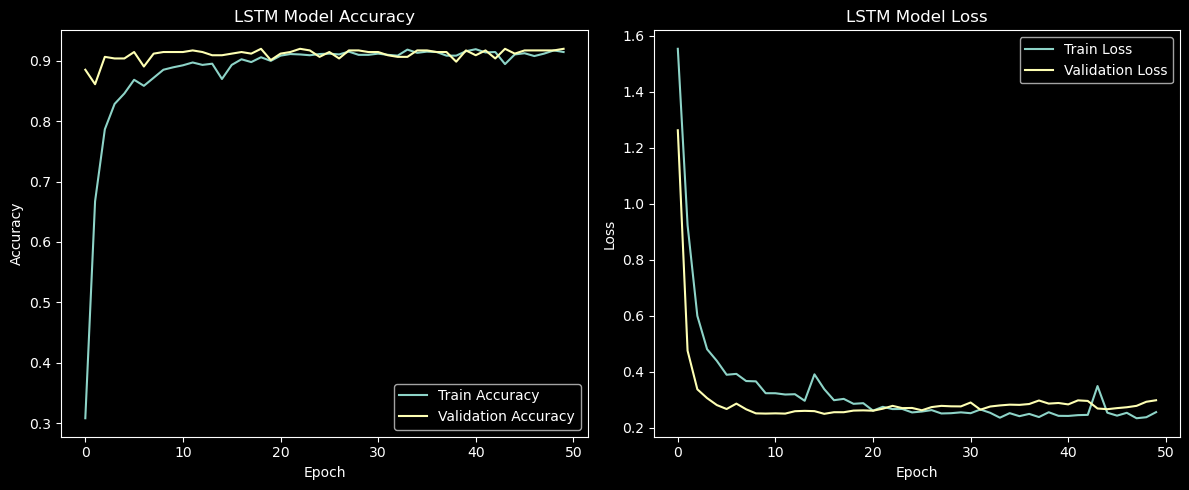

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load the dataset
data = pd.read_csv('sampled_data.csv')

# Preprocess the text column
def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

data['text'] = data['data'].apply(preprocess_text)

# Define the cybersecurity threat keywords
cyber_threat_keywords = ['D', 'F', 'G', 'S', 'R']

# Function to flag the text data based on the presence of cybersecurity threat keywords
def flag_cyber_threat(flag):
    return flag if flag in cyber_threat_keywords else 'null'

# Apply the function to the 'flag' column and create a new 'label' column
data['label'] = data['flag'].apply(flag_cyber_threat)

# Tokenize and pad the text data
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=max_len)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])
y = to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(max_words, 128))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
# Predict the test data
y_pred = model.predict(X_test)

# Convert predictions back to labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_)
print(report)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'LSTM Model Accuracy: {accuracy * 100:.2f}%')

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Cross-Breed of LSTM and Self-Attention Mechanism Performance: 90.40% @50 Epochs

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 116ms/step - accuracy: 0.1798 - loss: 1.6126 - val_accuracy: 0.2000 - val_loss: 1.6026
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.3984 - loss: 1.3945 - val_accuracy: 0.8987 - val_loss: 0.5015
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.8807 - loss: 0.4238 - val_accuracy: 0.9067 - val_loss: 0.2876
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.8902 - loss: 0.3115 - val_accuracy: 0.8693 - val_loss: 0.3064
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8960 - loss: 0.2802 - val_accuracy: 0.9040 - val_loss: 0.2592
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9116 - loss: 0.2632 - val_accuracy: 0.9147 - val_loss: 0.2485
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9063 - loss: 0.2582 - val_accuracy: 0.9067 - val_loss: 0.2432
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9153 - loss: 0.2394 - val_accuracy: 0.91

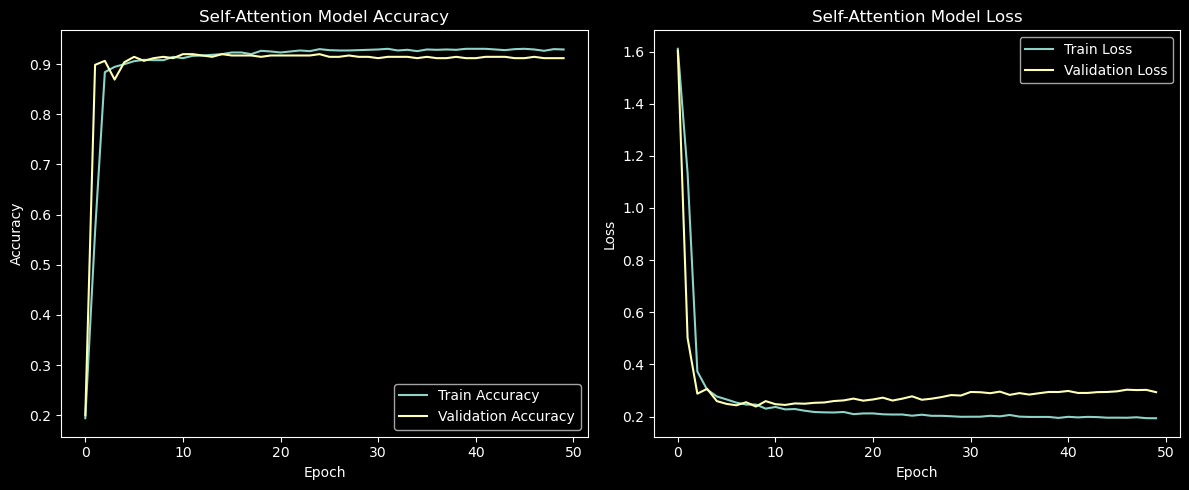

In [22]:
from tensorflow.keras.layers import Layer, Input, Dense, Embedding, Dropout, LSTM, Attention
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Load and preprocess the dataset as above

# Self-attention mechanism
class SelfAttention(Layer):
    def __init__(self, units):
        super(SelfAttention, self).__init__()
        self.W = Dense(units)
        self.U = Dense(1)

    def call(self, inputs):
        score = tf.nn.tanh(self.W(inputs))
        attention_weights = tf.nn.softmax(self.U(score), axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

# Prepare data
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=max_len)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Build the model with self-attention
inputs = Input(shape=(max_len,))
embedding_layer = Embedding(max_words, 128)(inputs)
lstm_layer = LSTM(64, return_sequences=True)(embedding_layer)
context_vector, attention_weights = SelfAttention(64)(lstm_layer)
output = Dense(y.shape[1], activation='softmax')(context_vector)

self_attention_model = Model(inputs=inputs, outputs=output)
self_attention_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
self_attention_history = self_attention_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = self_attention_model.evaluate(X_test, y_test)
print(f'Self-Attention Model Accuracy: {accuracy * 100:.2f}%')

# Predict the test data
y_pred = model.predict(X_test)

# Convert predictions back to labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_)
print(report)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(self_attention_history.history['accuracy'], label='Train Accuracy')
plt.plot(self_attention_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Self-Attention Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(self_attention_history.history['loss'], label='Train Loss')
plt.plot(self_attention_history.history['val_loss'], label='Validation Loss')
plt.title('Self-Attention Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


LSTMCapsNet Performance: 99.44% @50 EPOCH

Epoch 1, Accuracy: 0.2000
Epoch 2, Accuracy: 0.4000
Epoch 3, Accuracy: 0.4000
Epoch 4, Accuracy: 0.4528
Epoch 5, Accuracy: 0.6804
Epoch 6, Accuracy: 0.7456
Epoch 7, Accuracy: 0.7852
Epoch 8, Accuracy: 0.7896
Epoch 9, Accuracy: 0.7948
Epoch 10, Accuracy: 0.8096
Epoch 11, Accuracy: 0.9284
Epoch 12, Accuracy: 0.9860
Epoch 13, Accuracy: 0.9900
Epoch 14, Accuracy: 0.9912
Epoch 15, Accuracy: 0.9916
Epoch 16, Accuracy: 0.9916
Epoch 17, Accuracy: 0.9920
Epoch 18, Accuracy: 0.9920
Epoch 19, Accuracy: 0.9920
Epoch 20, Accuracy: 0.9924
Epoch 21, Accuracy: 0.9932
Epoch 22, Accuracy: 0.9932
Epoch 23, Accuracy: 0.9932
Epoch 24, Accuracy: 0.9932
Epoch 25, Accuracy: 0.9936
Epoch 26, Accuracy: 0.9936
Epoch 27, Accuracy: 0.9936
Epoch 28, Accuracy: 0.9936
Epoch 29, Accuracy: 0.9940
Epoch 30, Accuracy: 0.9940
Epoch 31, Accuracy: 0.9940
Epoch 32, Accuracy: 0.9940
Epoch 33, Accuracy: 0.9940
Epoch 34, Accuracy: 0.9940
Epoch 35, Accuracy: 0.9940
Epoch 36, Accuracy: 0.9940
Epoch 37, Accuracy: 0.9940
Epoch 38, 

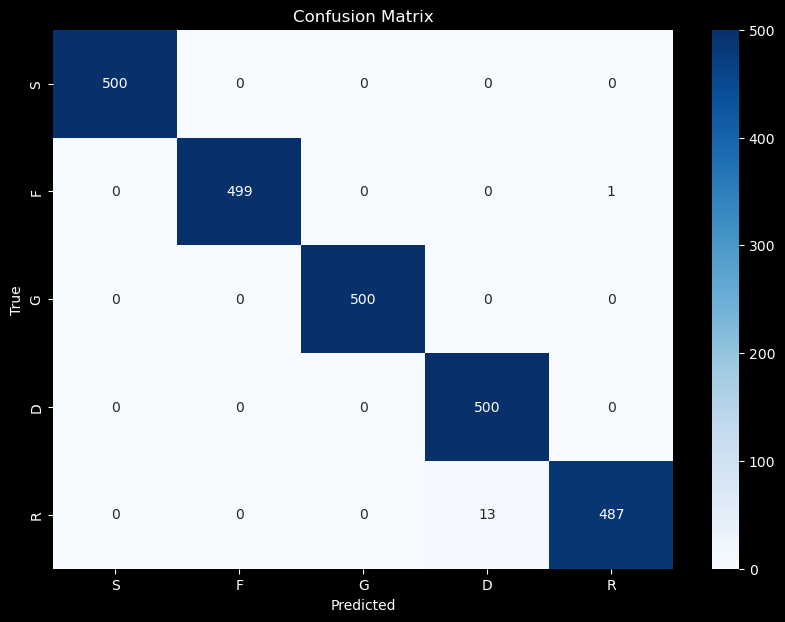

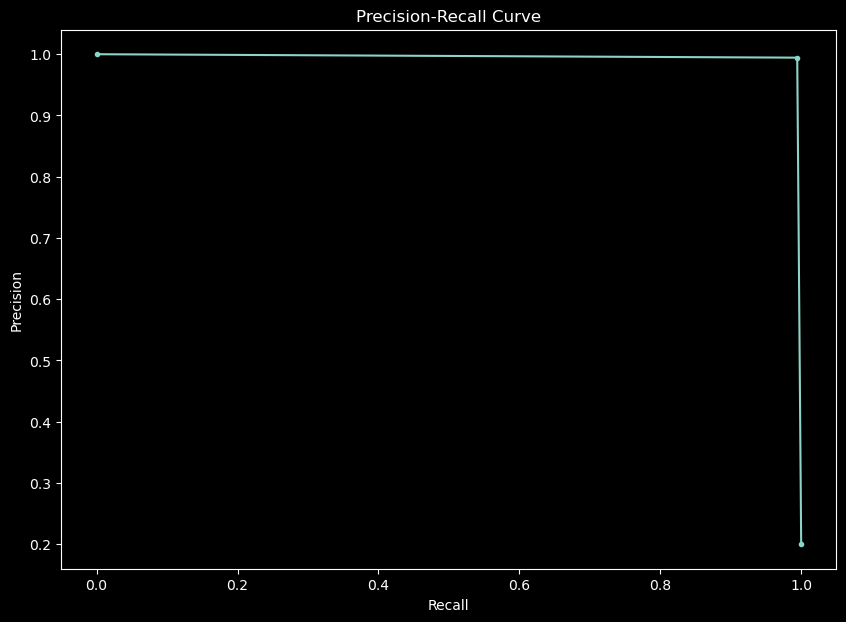

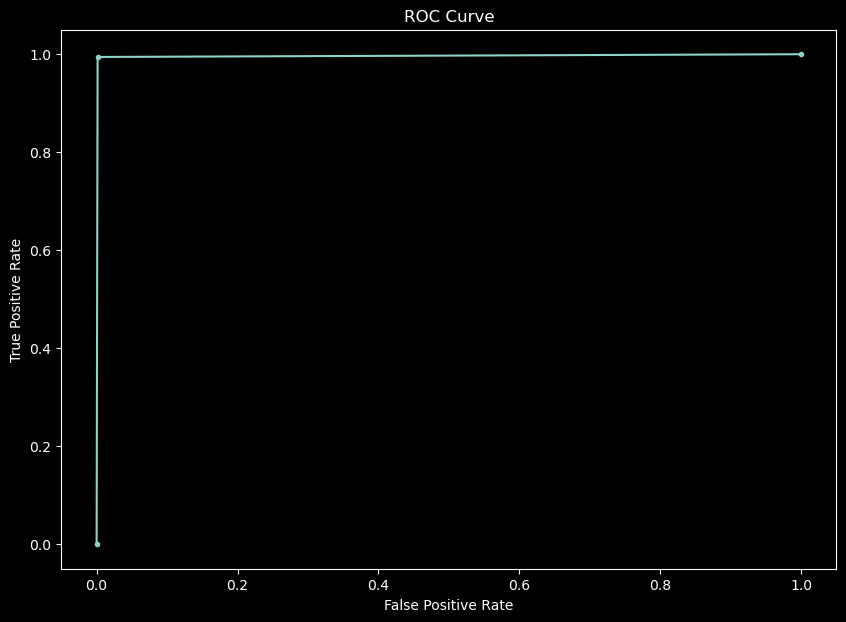

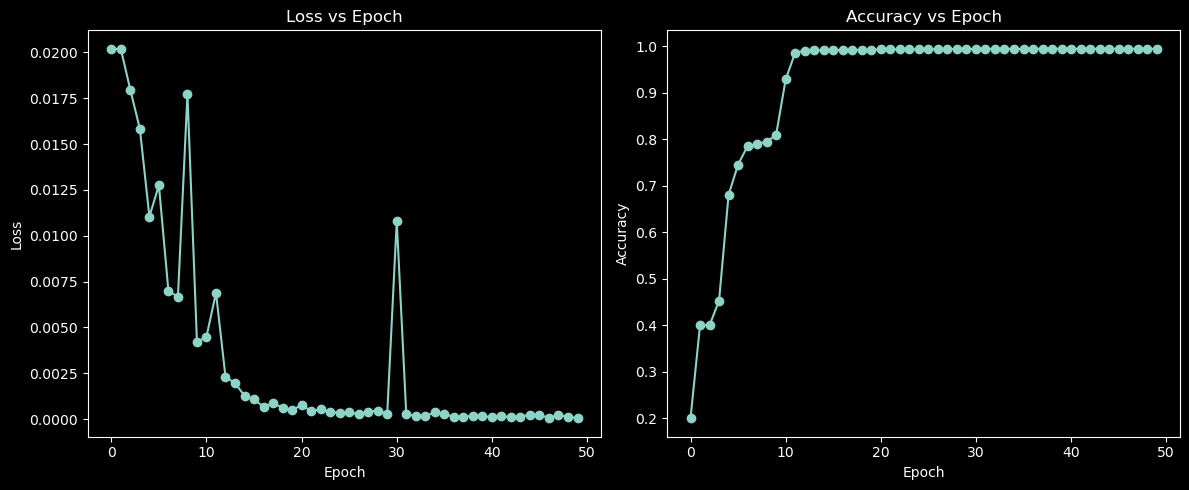

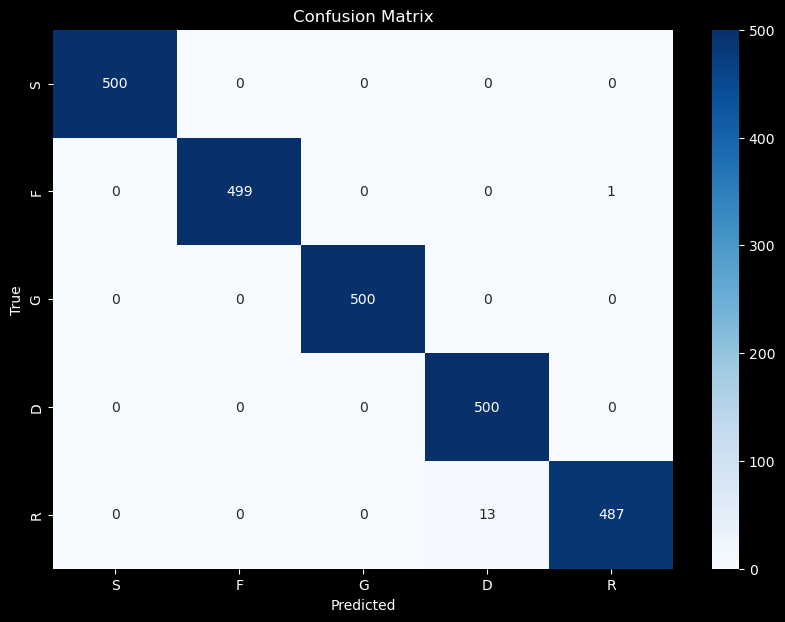

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Initialize lists to store loss and accuracy
losses = []
accuracies = []

# Load and preprocess data
class HexDataset(Dataset):
    def __init__(self, csv_file, max_length=8):
        self.data = pd.read_csv(csv_file)
        self.max_length = max_length
        self.data['data'] = self.data['data'].apply(self.hex_to_tensor)
        
        # Pad sequences to ensure they are the same length
        self.sequences = [self.pad_sequence(seq) for seq in self.data['data']]
        #self.sequences = np.array(self.sequences)
         # Convert categorical labels to integers
        self.label_mapping = {label: idx for idx, label in enumerate(self.data['flag'].unique())}
        self.data['flag'] = self.data['flag'].map(self.label_mapping)
        self.labels = torch.tensor(self.data['flag'].values, dtype=torch.long)

    def hex_to_tensor(self, hex_str):
        hex_bytes = bytes.fromhex(hex_str)
        tensor = torch.tensor(list(hex_bytes), dtype=torch.long)
        return tensor

    def pad_sequence(self, sequence):
        if len(sequence) < self.max_length:
            # Pad with zeros
            padding = torch.zeros(self.max_length - len(sequence))
            return torch.cat((sequence, padding))
        else:
            # Truncate if sequence is longer than max_length
            return sequence[:self.max_length]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return {'data': self.sequences[idx], 'label': self.labels[idx]}
# Define the model
class LSTMCapsNet(nn.Module):
    def __init__(self, vocab_size, embedding_dim, lstm_hidden_dim, num_classes, num_capsules, capsule_dim):
        super(LSTMCapsNet, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, lstm_hidden_dim, batch_first=True, bidirectional=True, num_layers=5)
        self.attention = nn.Linear(lstm_hidden_dim * 2, 1)
        self.primary_capsules = nn.Linear(lstm_hidden_dim * 2, num_capsules * capsule_dim)
        self.capsule_dim = capsule_dim
        self.num_capsules = num_capsules
        self.fc = nn.Linear(capsule_dim, num_classes)
        self.margin_loss = nn.CrossEntropyLoss()

    def forward(self, x):
        #print("x: ", x)
        x = x.type(torch.int)
        #print(' data type of x', x)
        x = self.embedding(x)
        lstm_out, (hn, cn) = self.lstm(x)
        attn_weights = torch.softmax(self.attention(lstm_out), dim=1)
        context_vector = torch.bmm(attn_weights.transpose(1, 2), lstm_out).squeeze(1)
        capsules = self.primary_capsules(context_vector)
        capsules = capsules.view(-1, self.num_capsules, self.capsule_dim)
        capsule_output = capsules.mean(dim=1)
        output = self.fc(capsule_output)
        return output

    def loss_function(self, output, target):
        return self.margin_loss(output, target)

def train(model, data_loader, optimizer, device):
    model.train()
    for batch in data_loader:
        # Unpack the batch dictionary
        data = batch['data']
        labels = batch['label']
        
        # Move data and labels to the device
        data, labels = data.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(data)
        #print("Outputs", outputs.shape)
        #print("labels", labels.shape)
        loss = criterion(outputs, labels)
        #print("Loss: ", loss.item())
        #epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
        #epoch_loss = loss.item()
    losses.append(loss.item() / len(data_loader))

def evaluate(model, data_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in data_loader:
            data = batch['data']
            labels = batch['label']
            data, labels = data.to(device), labels.to(device)
            
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    accuracies.append(accuracy)
    return accuracy
    
    #return correct / total


# Initialize model, optimizer
vocab_size = 256  # Assuming hex values range from 0-255
embedding_dim = 128
lstm_hidden_dim = 256
num_classes = len(pd.read_csv('sampled_data.csv')['flag'].unique())
num_capsules = 10
capsule_dim = 16

model = LSTMCapsNet(vocab_size, embedding_dim, lstm_hidden_dim, num_classes, num_capsules, capsule_dim)
import torch
import torch.nn as nn
import torch.optim as optim

# Example parameters (you should adjust these based on your dataset and model requirements)
#vocab_size = 5000  # size of the vocabulary
#embedding_dim = 300  # dimension of word embeddings
#lstm_hidden_dim = 128  # hidden dimension size of LSTM
#num_classes = 5  # number of output classes
#num_capsules = 10  # number of capsules in the primary capsule layer
#capsule_dim = 16  # dimension of each capsule

optimizer = optim.Adam(model.parameters(), lr=0.00001)
criterion = nn.CrossEntropyLoss()

# Load data
dataset = HexDataset('sampled_data.csv')
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
n_epoch = 50
# Training loop
for epoch in range(n_epoch):  # Number of epochs
    train(model, data_loader, optimizer, device)
    accuracy = evaluate(model, data_loader, device)
    print(f'Epoch {epoch + 1}, Accuracy: {accuracy:.4f}')
    

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Collect predictions and true labels
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in data_loader:
        data = batch['data'].to(device)
        labels = batch['label'].to(device)
        outputs = model(data)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=dataset.label_mapping.keys()))

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.label_mapping.keys(), yticklabels=dataset.label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
binarized_labels = label_binarize(all_labels, classes=range(num_classes))
binarized_preds = label_binarize(all_preds, classes=range(num_classes))

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(binarized_labels.ravel(), binarized_preds.ravel())
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(binarized_labels.ravel(), binarized_preds.ravel())
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



# Plot loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(0, n_epoch), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')

plt.subplot(1, 2, 2)
plt.plot(range(0, n_epoch), accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')

plt.tight_layout()
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.label_mapping.keys(), yticklabels=dataset.label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


LSTMCapsNet With self Attention Mechanism Performance: